# _Are Professional Forecasters Rational_?
## Analysis by Jack Pawson


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
from scipy import stats

from scipy.stats import norm 
sns.set_theme()
import os
print(os.getcwd())
import imageio
rng = np.random.default_rng()

from IPython.display import FileLink


#importing all the things we need 

/Users/jackpawson/ECON 416/416 data


In [17]:
os.chdir('/Users/jackpawson/ECON 416/416 data') #setting directory 

# Documentation
### PRUNEMP
Density projections represent the annual-average unemployment rate falling into various ranges, measured in percentage points. The annual-average unemployment rate
is the average of the 12 monthly unemployment rates of the year. See the
section on “Mean Probability Forecasts” for additional details.
First survey to include this variable: 2009:Q2.


In [18]:
forecasts = pd.read_excel('SPFmicrodata.xlsx', sheet_name = 'PRUNEMP') 

#reading in data and the sheet we will work with 

/Users/jackpawson/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [19]:
print(forecasts.head())

   YEAR  QUARTER  ID  INDUSTRY  PRUNEMP1  PRUNEMP2  PRUNEMP3  PRUNEMP4  \
0  1968        4   1       NaN       NaN       NaN       NaN       NaN   
1  1968        4   2       NaN       NaN       NaN       NaN       NaN   
2  1968        4   3       NaN       NaN       NaN       NaN       NaN   
3  1968        4   4       NaN       NaN       NaN       NaN       NaN   
4  1968        4   5       NaN       NaN       NaN       NaN       NaN   

   PRUNEMP5  PRUNEMP6  ...  PRUNEMP31  PRUNEMP32  PRUNEMP33  PRUNEMP34  \
0       NaN       NaN  ...        NaN        NaN        NaN        NaN   
1       NaN       NaN  ...        NaN        NaN        NaN        NaN   
2       NaN       NaN  ...        NaN        NaN        NaN        NaN   
3       NaN       NaN  ...        NaN        NaN        NaN        NaN   
4       NaN       NaN  ...        NaN        NaN        NaN        NaN   

   PRUNEMP35  PRUNEMP36  PRUNEMP37  PRUNEMP38  PRUNEMP39  PRUNEMP40  
0        NaN        NaN        NaN      

In [20]:
forecasts = forecasts.iloc[6544:,[0,1,2,14,15,16,17,18,19,20,21,22,23]]

#attain the correct columns which we will use in the analysis
#6544 is the excel row that is the start of Q2 2009

This table shows how each column represents a given probability of unemployment. We can alter our column names to reflect the range each column represents. Since the columns represent differnet ranges in different time periods, we can split our DataFrame into 3, each new DataFrame representing a particular time range. We do not need to create a datset for 2024 Q2 through the present, sicne we do not have that data. The data only goes up to Q1 of 2024.


In [21]:
forecasts.columns

Index(['YEAR', 'QUARTER', 'ID', 'PRUNEMP11', 'PRUNEMP12', 'PRUNEMP13',
       'PRUNEMP14', 'PRUNEMP15', 'PRUNEMP16', 'PRUNEMP17', 'PRUNEMP18',
       'PRUNEMP19', 'PRUNEMP20'],
      dtype='object')

## Which forecasters are the most prolific?

We are going to look at the data from the 3 forecasters with the most entries in the DataFrame. To determine which ID's these are, we can use groupby.


In [22]:
IDs = forecasts.groupby('ID') #group by IDS 
IDs_size = IDs.size() #determine the size of IDs 
IDs_size.sort_values() #find the IDs with the most entries 

ID
99      1
566     1
544     1
530     1
84      2
       ..
504    58
555    59
518    59
510    60
549    60
Length: 95, dtype: int64

We want to look at the most prolific forecasters, whose IDs are:
- 549.0
- 510.0
- 518.0

We can limit our DataFrame to only those three forecasters' forecasts.


In [23]:
forecasts['DATE'] = pd.PeriodIndex(year=forecasts['YEAR'],quarter=forecasts['QUARTER'],freq='Q')
forecasts.set_index(['ID', 'DATE'], inplace = True)
forecasts = forecasts.drop('YEAR', axis = 1)
forecasts = forecasts.drop ('QUARTER', axis = 1)

forecasts_prolific = forecasts

## Regulating Forecasters

We have to ensure that for each ID and forecast, their probability distribution sums to 100. in order to do so, we can sum up each row, and divide the probabilities by the sum. So, if a row summed up to only 98, each probability would be divided by 0.98, such that the sum of the probabilities summed to 100. Right now, we have the data from our three forecasters, but we do not know if the data sums to 100% for each Date.


In [13]:
columns = [col for col in forecasts_prolific.columns]
columns 

['PRUNEMP11',
 'PRUNEMP12',
 'PRUNEMP13',
 'PRUNEMP14',
 'PRUNEMP15',
 'PRUNEMP16',
 'PRUNEMP17',
 'PRUNEMP18',
 'PRUNEMP19',
 'PRUNEMP20']

In [14]:
def sum_to_100(row): #ensures the probabilities sum to 100 
    rsum = row.sum() #row sum 
    if rsum != 100: #
        row = (row/rsum) *100 #divides by sum and multiplies to 100 
        return row
    else:
        return row

In [15]:
forecasts_prolific[columns] = forecasts_prolific[columns].apply(sum_to_100, axis = 1)
forecasts_prolific[columns]

PRUNEMP11  PRUNEMP12  PRUNEMP13  PRUNEMP14  PRUNEMP15  PRUNEMP16  \
ID  DATE                                                                       
549 2009Q2        0.0       15.0       50.0       35.0        0.0        0.0   
    2009Q3        0.0       10.0       55.0       35.0        0.0        0.0   
    2009Q4        0.0       55.0       45.0        0.0        0.0        0.0   
    2010Q1        0.0        0.0       35.0       55.0       10.0        0.0   
    2010Q2        0.0        0.0       20.0       60.0       20.0        0.0   
...               ...        ...        ...        ...        ...        ...   
518 2023Q1        0.0        0.0        0.0        0.0        0.0       10.0   
    2023Q2        0.0        0.0        0.0        0.0        0.0        0.0   
    2023Q3        0.0        0.0        0.0        0.0        0.0        0.0   
    2023Q4        0.0        0.0        0.0        0.0        0.0        0.0   
    2024Q1        0.0        0.0        0.0        0.0        0.0        0.0   

            PRUNEMP17  PRUNEMP18  PRUNEMP19  PRUNEMP20  
ID  DATE                                                
549 2009Q2        0.0        0.0        0.0        0.0  
    2009Q3        0.0        0.0        0.0        0.0  
    2009Q4        0.0        0.0        0.0        0.0  
    2010Q1        0.0        0.0        0.0        0.0  
    2010Q2        0.0        0.0        0.0        0.0  
...               ...        ...        ...        ...  
518 2023Q1       40.0       40.0       10.0        0.0  
    2023Q2       10.0       70.0       20.0        0.0  
    2023Q3       10.0       70.0       20.0        0.0  
    2023Q4       10.0       80.0       10.0        0.0  
    2024Q1       20.0       70.0       10.0        0.0  

[179 rows x 10 columns]

In [16]:
print(forecasts_prolific[columns].sum(axis=1).head(50))

#The sum of all the columns together for all of the IDs and forecasters is equivalent to 100. 

ID   DATE  
549  2009Q2    100.0
     2009Q3    100.0
     2009Q4    100.0
     2010Q1    100.0
     2010Q2    100.0
     2010Q3    100.0
     2010Q4    100.0
     2011Q1    100.0
     2011Q2    100.0
     2011Q3    100.0
     2011Q4    100.0
     2012Q1    100.0
     2012Q2    100.0
     2012Q3    100.0
     2012Q4    100.0
     2013Q1    100.0
     2013Q2    100.0
     2013Q3    100.0
     2013Q4    100.0
     2014Q1    100.0
     2014Q2    100.0
     2014Q3    100.0
     2014Q4    100.0
     2015Q1    100.0
     2015Q2    100.0
     2015Q3    100.0
     2015Q4    100.0
     2016Q1    100.0
     2016Q2    100.0
     2016Q3    100.0
     2016Q4    100.0
     2017Q1    100.0
     2017Q2    100.0
     2017Q3    100.0
     2017Q4    100.0
     2018Q1    100.0
     2018Q2    100.0
     2018Q3    100.0
     2018Q4    100.0
     2019Q1    100.0
     2019Q2    100.0
     2019Q3    100.0
     2019Q4    100.0
     2020Q1    100.0
     2020Q2    100.0
     2020Q3    100.0
     2020Q4    100.0
 

Now we can see that for our rows of data, the sum of the probability distributions is always 100. We do not have to worry whether or not a forecaster has made an error in their calculation. We can finally begin looking at the data, and using it to draw conclusions about the rationality of our forecasters.

# Data sampling

## Interval Assignment Function

<img src="Probability Table.png">


In [30]:
intervals_t1 = [[2.0, 5.9], [6.0,6.9],[7.0,7.4],[7.5,7.9], [8.0,8.4],
                [8.5,8.9], [9.0,9.4], [9.5,9.9], [10.0, 10.9], [11.0,20.0]]

intervals_t2 = [[2.0, 3.9], [4.0,4.9],[5.0,5.4],[5.5,5.9], [6.0,6.4],
                [6.5,6.9], [7.0,7.4], [7.5,7.9], [8.0, 8.9], [9.0,20.0]]

intervals_t3 = [[2.0, 2.9], [3.0, 3.9],[4.0,4.9],[5.0,5.9], [6.0,6.9],
                [7.0,7.9], [8.0,9.9], [10.0,11.9], [12.0, 14.9], [15.0,20.0]]


In [31]:
intervals_t1 = [[2.0, 5.9], [6.0, 6.9], [7.0, 7.4], [7.5, 7.9], [8.0, 8.4], [8.5, 8.9], [9.0, 9.4], [9.5, 9.9], [10.0, 10.9], [11.0, 20.0]]
intervals_t2 = [[2.0, 3.9], [4.0, 4.9], [5.0, 5.4], [5.5, 5.9], [6.0, 6.4], [6.5, 6.9], [7.0, 7.4], [7.5, 7.9], [8.0, 8.9], [9.0, 20.0]]
intervals_t3 = [[2.0, 2.9], [3.0, 3.9], [4.0, 4.9], [5.0, 5.9], [6.0, 6.9], [7.0, 7.9], [8.0, 9.9], [10.0, 11.9], [12.0, 14.9], [15.0, 20.0]]


In [32]:
reversed_intervals_t1 = intervals_t1[::-1]
reversed_intervals_t2 = intervals_t2[::-1]
reversed_intervals_t3 = intervals_t3[::-1]

We have to reverse the intervals, because according to the documentation of the forecasters predictions, column 11 is actually related to the higher interval, rather than the lower interval. As the column number increases, the intervals descend. If we did not reverse the intervals (or simply write them in reverse order originally), the intervals would be incorrectly related to the columns in the DataFrame


In [33]:
def interval_assign(date): 
    
    if date >= pd.Period('2020Q2'):#interval 3 
        
        return reversed_intervals_t3
    
    elif date >= pd.Period('2014Q1'): #interval 2 
        
        return reversed_intervals_t2
    
    else: #interval 1 
        
        return reversed_intervals_t1

Depending on the the date, our columns correspond to different intervals. This function assigns the correct interval depending on the date of the row.

There are 3 different interval distinctions dependign on the time of the forecast.
In the first time period (2009- 2013Q4): The intervals are:
```
[[0, 5.9]
[6.0,6.9]
[7.0,7.4]
[7.5,7.9]
[8.0,8.4]
[8.5,8.9]
[9.0,9.4]
[9.5,9.9]
[10.0,10.9]
[11.0,99]]
```
In the second time period (2014Q1 - 2020Q1): The intervals are:
```
[[0, 3.9]
[4.0,4.9]
[5.0,5.4]
[5.5,5.9]
[6.0,6.4]
[6.5,6.9]
[7.0,7.4]
[7.5,7.9]
[8.0, 8.9]
[9.0,99.0]]
```
In the third time period (2020Q2 - 2024Q1): The intervals are:
```
[[0, 2.9]
[3.0, 3.9]
[4.0,4.9]
[5.0,5.9]
[6.0,6.9]
[7.0,7.9]
[8.0,9.9]
[10.0,11.9]
[12.0, 14.9]
[15.0,99.0]]
```
Depending on the time of the forecasts, the meaning of the data column changes. When we are creating our sampling distributions, we have to assign the intervals based on the Date of the forecasts.

### generate_samples(row, date, num_samples) function


In [35]:
def generate_samples(row, date, num_samples):
    
    intervals = interval_assign(date) #assigning the correct interval 
    samples = [] #will hold the samples we draw 
    
    if row.sum() == 0:
        
        return [None] * num_samples #if the value of the row does not sum properly we create a null value
    
    normalized_probs = row / row.sum() #making sure the probabilities go to 100 
    for _ in range(num_samples):
        #for the length of the determined samples, we create a random number and assign it to the interval 
        
        chosen_index = rng.choice(len(row), p=normalized_probs) #stores teh randomly chosen index, based on the simulation 
        
        #the rng.choice chooses an interval based on the probabilities in each row 
        sample = rng.uniform(intervals[chosen_index][0], intervals[chosen_index][1])
        samples.append(sample)
        
    return samples #returns the samples in the form of a list, 
#which we can tirn into a dataframe later to visualize and analyze. 




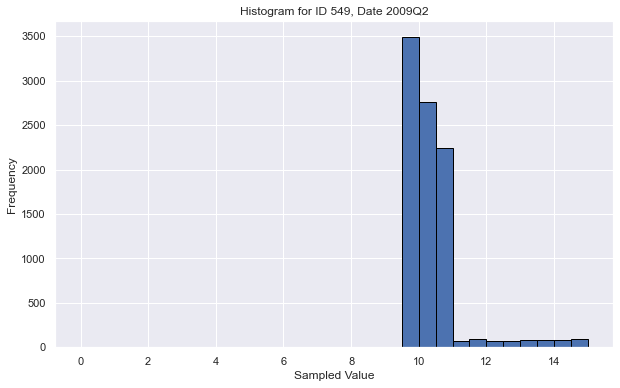

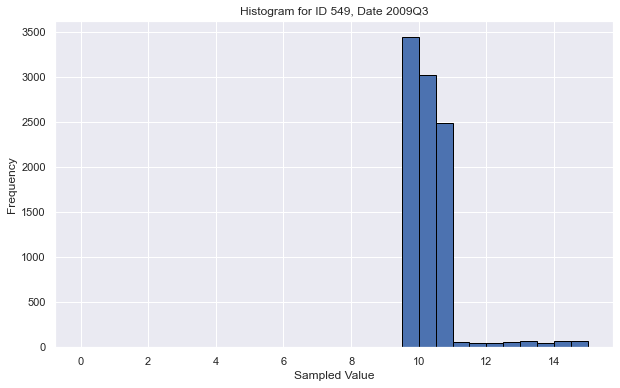

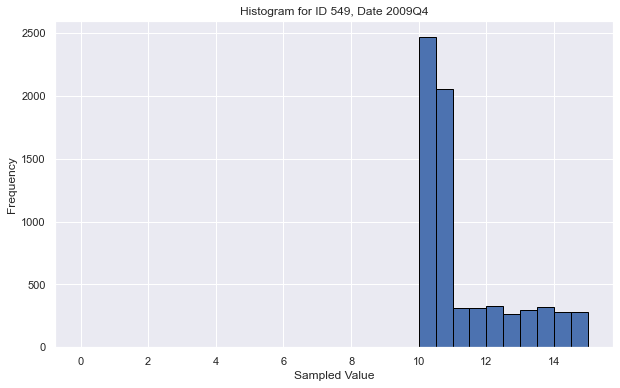

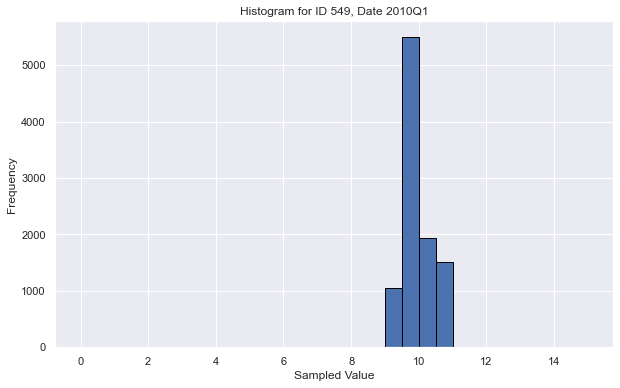

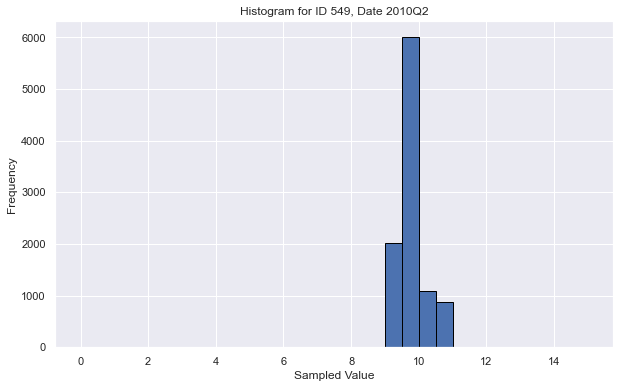

In [459]:
sampled_data = {} #creates a dictionary, which will hold the data and the index of each sample 
#will be turned into a dataframe

for idx, row in forecasts_prolific.iterrows(): #.iterrows() allows us to go through all the rows of data in a loop
    
    #will run for all the indexes and rows of the index in the original forecasts_prolific dataframe 
    
    date = pd.Period(idx[1], freq='Q' )  #gets the date from the index (period index with quarterly frequency)
    samples = generate_samples(row[1:], date, 10000 ) #the 10000 is the number of samples being drawn 
    
    sampled_data[(idx[0], idx[1])] = samples
    
    if len(sampled_data) <= 5:  #plots the first 5 histograms to ensure correctness 
        #once more than 5 things are sampled, it will not plot, but we can be sure it is doing it correctly 
        #we can manually check teh dataframe to ensure the correct intervals are beign plotted 
        plt.figure(figsize=(10, 6))
        plt.hist(samples, bins=30, edgecolor='black', range = (0,15) )
        plt.title(f'Histogram for ID {idx[0]}, Date {idx[1]}' ) #shows the ID and the period of the histogram 
        plt.xlabel('Sampled Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

These are 5 example of the histograms. (The ID and Date is listed as the title).


In [460]:
sampled_data_df = pd.DataFrame(sampled_data).T #make the index not columns 
sampled_data_df

0          1          2          3          4          5     \
549 2009Q2  10.075663  10.744817  10.337422  10.124109   10.05255  15.806896   
    2009Q3  10.804553  10.218431   10.45896  12.248708  16.307551  10.402161   
    2009Q4   19.22721  16.672035   10.54456  10.857246  19.650731   10.73792   
    2010Q1  10.180458   9.878073    9.73497   9.709186   9.613101   9.706195   
    2010Q2  10.115604   9.551582  10.211938   9.700359   9.757273   9.010225   
...               ...        ...        ...        ...        ...        ...   
518 2023Q1   5.741466   6.875587    5.44131   6.352003   5.827214   5.318658   
    2023Q2   4.220323   6.074795   5.243102   5.441579   4.050251   4.229661   
    2023Q3   4.815637   5.161647   5.193393   5.350674   5.043322   5.180675   
    2023Q4   5.704593   6.395306   6.340422   5.812348   5.075979   5.810856   
    2024Q1   4.517088   6.608048   4.501364   6.120307   6.433274   5.561253   

                 6          7          8          9     ...       9990  \
549 2009Q2  10.758614  10.856813  12.242764   9.870705  ...    9.69183   
    2009Q3   9.697155  10.040752   9.778909  10.247334  ...  10.138163   
    2009Q4  16.056439  14.614138  12.645204  12.473046  ...  19.616108   
    2010Q1   9.802433   9.875604   9.685579   9.761097  ...   9.200514   
    2010Q2   9.647653    9.68397   9.189669   9.033603  ...   9.568899   
...               ...        ...        ...        ...  ...        ...   
518 2023Q1   5.558212   6.199698   5.252497   5.050453  ...   5.570734   
    2023Q2   5.136588   5.501205   6.871835   5.355857  ...   5.662003   
    2023Q3   5.023679   5.721395   5.892127   5.274698  ...   5.108214   
    2023Q4   5.055513   5.333208   6.430118   5.302838  ...   5.204979   
    2024Q1   5.529883   5.624197   5.897633   6.791664  ...    5.80789   

                 9991       9992       9993       9994       9995       9996  \
549 2009Q2   9.519405   9.746811    10.8977  10.133284  10.759177   10.02617   
    2009Q3  18.402344  13.324724   9.884616  10.794514   9.664574   9.675228   
    2009Q4  10.608005  14.206798  15.202268  10.106818  13.709708  10.680092   
    2010Q1   9.536122   9.618087   9.532638  10.715168  10.601795  10.075879   
    2010Q2   9.725522   9.561739  10.744379   9.196993   9.531574   9.034102   
...               ...        ...        ...        ...        ...        ...   
518 2023Q1   5.177117   5.660806    6.63792   4.685088   4.070693   7.307217   
    2023Q2    6.74233   5.647091   4.405082   4.407491   4.899099   4.456426   
    2023Q3    5.64061   5.035834   5.532433   5.700932   6.837837    6.39337   
    2023Q4   5.832563   6.130743   4.530329   5.822689   5.322187     5.7405   
    2024Q1   6.626099   5.312805   5.540099    5.19293   6.064713    5.88874   

                 9997       9998       9999  
549 2009Q2   10.59754  13.052005   9.558318  
    2009Q3  10.720762   10.32244   9.853113  
    2009Q4  17.722909  13.451624  11.393482  
    2010Q1   9.520107  10.165186   9.584829  
    2010Q2   9.547359   9.837456   9.272661  
...               ...        ...        ...  
518 2023Q1   6.096041   6.820979   4.628983  
    2023Q2    6.52937   5.319118   5.418957  
    2023Q3   5.122193   4.158942   6.412353  
    2023Q4   5.865344   5.137297   5.683325  
    2024Q1   5.503061   5.740036   4.033333  

[179 rows x 10000 columns]

## Working With Actual Unemployment Data


In [461]:
Unemployment = pd.read_excel('UNRATE-2.xls')

In [462]:
# changing the Observation date to a DateTime index 

Unemployment['observation_date'] = pd.to_datetime(Unemployment['observation_date'])
Unemployment['observation_date'] = Unemployment['observation_date'].dt.to_period('Y')
Unemployment.set_index('observation_date', inplace = True)
Unemployment


,UNRATE
observation_date,
1948,3.4
1948,3.8
1948,4.0
1948,3.9
1948,3.5
...,...
2023,3.7
2023,3.7
2024,3.7


In [463]:
Annual_Unemployment = Unemployment.groupby(Unemployment.index).mean() #Groups by the unemployment dataframe index for each mean

Annual_Unemployment = Annual_Unemployment.rename(columns={'UNRATE': 'Observed Unemployment'}) #changing name 
Annual_Unemployment = Annual_Unemployment[Annual_Unemployment.index >= '2009'] #only keep 2009 and after 
Annual_Unemployment.head()

,Observed Unemployment
observation_date,
2009,9.283333
2010,9.608333
2011,8.933333
2012,8.075000
2013,7.358333


In [464]:
Annual_Unemployment = Annual_Unemployment.resample('Q').ffill() #fills the values so that the yearly data average makes
#sense for the obeservation date quarterly 

Annual_Unemployment = Annual_Unemployment['2009Q2':]#only starts from quarter 2 in 20009 
Annual_Unemployment.head()

,Observed Unemployment
observation_date,
2009Q2,9.283333
2009Q3,9.283333
2009Q4,9.283333
2010Q1,9.608333
2010Q2,9.608333


(array([16.,  4.,  0.,  4.,  0.,  0.,  4.,  0.,  8.,  0.,  0.,  0.,  4.,
         0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,
         4.,  0.,  3.,  4.]),
 array([3.625     , 3.82444444, 4.02388889, 4.22333333, 4.42277778,
        4.62222222, 4.82166667, 5.02111111, 5.22055556, 5.42      ,
        5.61944444, 5.81888889, 6.01833333, 6.21777778, 6.41722222,
        6.61666667, 6.81611111, 7.01555556, 7.215     , 7.41444444,
        7.61388889, 7.81333333, 8.01277778, 8.21222222, 8.41166667,
        8.61111111, 8.81055556, 9.01      , 9.20944444, 9.40888889,
        9.60833333]),
 <BarContainer object of 30 artists>)

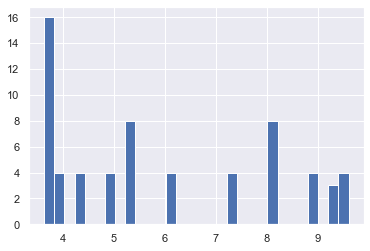

In [465]:
plt.hist(Annual_Unemployment, bins = 30) #visualziation of the unemployment rate over the period. Somewhat normally distributed

This gives us an idea of how the annual unemployment rate has been distributed across time

# Determing Rationality: Are Forecasters Rational?

# Method 1
### _Calculate P-values based on number of values in the distribution which are less than or greater than the actual unemployment value_


In [466]:
M1_p_values_df = pd.DataFrame(index=sampled_data_df.index, columns=['P-Value'])#creates the Pvalue that we will start to work with 

# Iterate over each ID and period in the transposed sampled data
for (id, period), samples in sampled_data_df.iterrows(): #will loop through all the IDs and periods which caintian sampled data 
    if period in Annual_Unemployment.index: 
        #will only work if the time is in the Annual Unemployment period index, just to make sure the rows and columns allign correctly 
        mean_unemployment = Annual_Unemployment.loc[period, 'Observed Unemployment']
        
        # Calculate the two-sided p-value
        less_equal = np.mean(samples <= mean_unemployment) #finds sample values less than observed
        greater_equal = np.mean(samples >= mean_unemployment) #finds sample values greater than the observed unemployment 
        
        #calculates the 2 sided p value of the value 
        p_value = 2 * min(less_equal, greater_equal) 
        #depending on whether the value is extreme as a minimum or maximum, and then multiplies it by two since its two-sided
        
        M1_p_values_df.loc[(id, period), 'P-Value'] = p_value #adds the Pvalue to our method 1 datagrame 

M1_p_values_df

P-Value
549 2009Q2     0.0
    2009Q3     0.0
    2009Q4     0.0
    2010Q1  0.5094
    2010Q2  0.7252
...            ...
518 2023Q1     0.0
    2023Q2     0.0
    2023Q3     0.0
    2023Q4     0.0
    2024Q1     0.0

[179 rows x 1 columns]

#### There are so many 0.0 p-values, because some forecasters gave a 0% probability of the observed unemployment rate occuring during a period.

## Visualizing Method 1 P-values


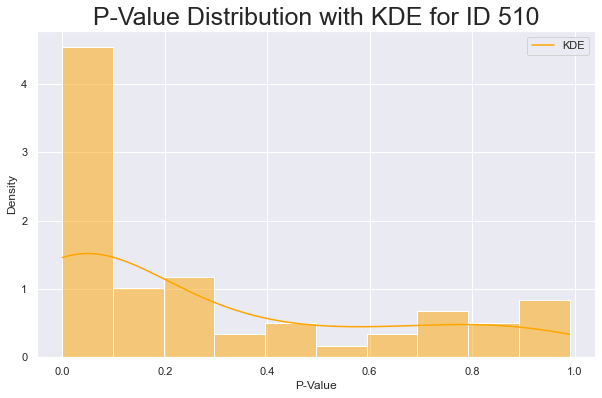

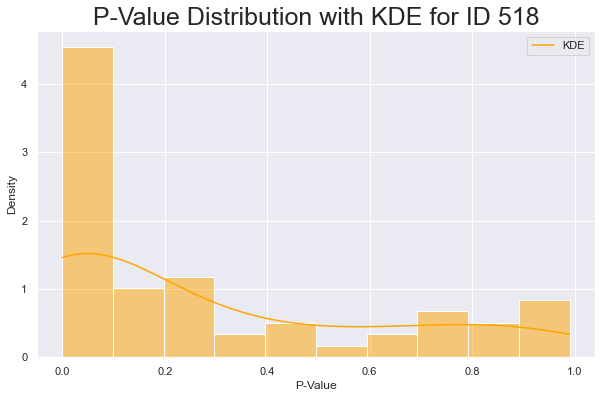

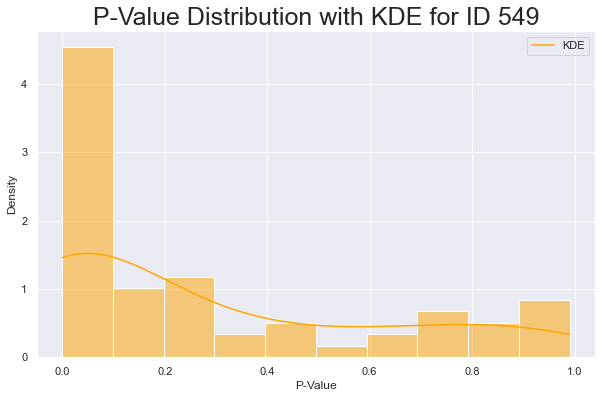

In [487]:
for id, data in m1_p_values_df.groupby(level=0):#for every ID and its data it groups and ptos 
    
    #Each graph is the p_value of the ID in the dataframe 
    plt.figure(figsize=(10, 6))
    sns.histplot(group['P-Value'], bins=10, kde=True, stat='density', color='orange', line_kws={ 'label ' : 'KDE'})
    
    plt.title(f'P-Value Distribution with KDE for ID {id}', fontsize = 25) #
    plt.xlabel('P-Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

We can see that the distributions of the P-values is realtively the same for the 3 IDs we are analyzing.

### Overall distribiton of P-values for all the IDs


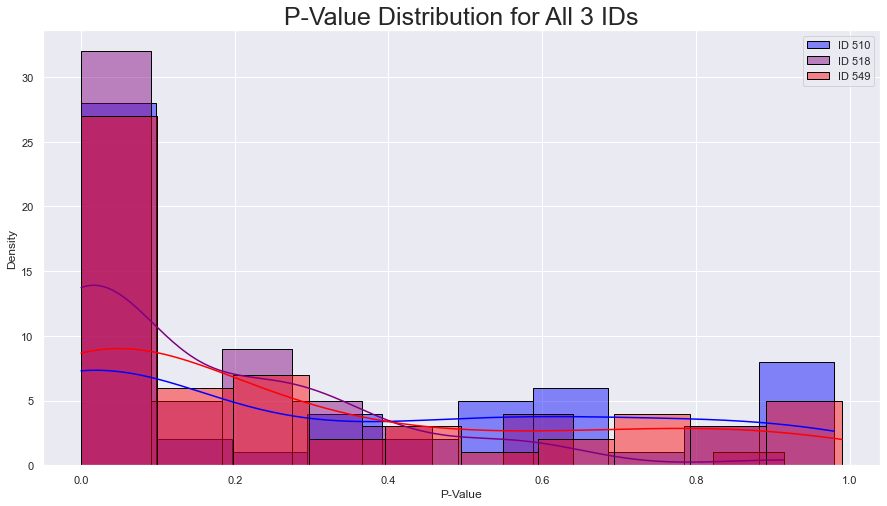

In [468]:
plt.figure(figsize=(15, 8))
colors = ['blue', 'purple', 'red']  #Different colors for each ID plotted
for i, (id, group) in enumerate(p_values_df.groupby(level=0)): #multi index so level needs specification 
    
    # Plot histogram with kernel density estimate for each ID
    sns.histplot(group['P-Value'], bins=10, kde=True, color=colors[i],label=f'ID {id}', alpha=0.45, edgecolor='black')

plt.title('P-Value Distribution for All 3 IDs', fontsize = 25)

plt.xlabel('P-Value')
plt.ylabel('Density')
plt.legend() #since all are on the saame graph, label which color is which 
plt.show()

### This plot zooms in specifically on the low end of the distribution


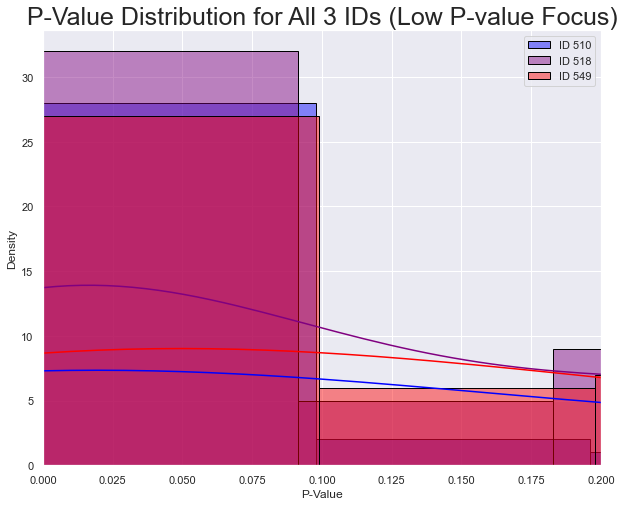

In [469]:

plt.figure(figsize=(10, 8))
colors = ['blue', 'purple', 'red']  #colors are kept consistent 
for i, (id, data) in enumerate(p_values_df.groupby(level=0)): #for each ID it plots the distribution of p values 

    sns.histplot(data['P-Value'], bins=10, kde=True, color=colors[i], #kde generates the lines to imply distribution  
        label=f'ID {id}', alpha=0.45, edgecolor='black')

plt.title('P-Value Distribution for All 3 IDs (Low P-value Focus)', fontsize = 25)
plt.xlabel('P-Value')
plt.ylabel('Density')
plt.xlim(0,0.2)
plt.legend()
plt.show()

## Analysis

For all three of our forecasters (549, 518, and 549), we can see that there are a significant amount of extrordinarily small P-values.
The three forecasters themselves have similar distributions. For all three IDs, the distribution of thier p-values was simular to that of a lambda = 1 Poisson distribution. There is a huge amount of p-values close to zero.
As far as the differences between the forecasters based on ID, the least egregious forecaster was ID = 510, since their distribution was less Poisson-esque (lower spike of p-values concentrated around 0). Based on the visualizations, forecaster with ID = 518 was the least precise and least accurate forecaster, with the highest concentration of low-p values.
The reason that there are so many P-values which come out to zero, is because for a large portion of the forecasts made by the professional forecasters, they only include probabilities for 2-3 intervals. It is not possible for a sample to be drawn which includes a number outside of the intervals provided by the forecasters, for each period. So, if the observed unemployment rate is outside of their interval, the p-value will be zero. Still, this still means that the observed value of unemployment and the value of the unemployment rate implied by the forecasters, is often unaligned.
These visualizations serve as evidence to suggest that the forecasteres are not rational, since theier beliefs about the future unemployment level, largely do not coincide with the observed value of annual unemployment. Still, we can learn more about the accuracy of the forecasts by using other methods of analysis. These methods are explored in the next section, 'Method 2'.

# Method 2
### _Determine whether or not forecasters are rational by looking at the statistical identity and characteristics of thier subjective probability distributions. Additionally, we can see how the mean forecasts and actual unemployment rate coincided over time_


In [470]:
standardized_sampled_data = []#list to hold the sampled data 

for key, sample in sampled_data.items(): #Accesses the key values pairs in teh sampled_data dictionary 
    #Filter out None values
    filtered_samples = [x for x in sample if x is not None] #will contain x so long as x has a non None value 
    # Check if filtered_samples is not empty before calculating statistics
    if filtered_samples: #filtered samples contains the values that arent none 
        mean = np.mean(filtered_samples) #find the mean of each sampling process
        std = np.std(filtered_samples) #find the std of each sampling process
    else: 
        
        mean = None #if there is no sample value, there isnt a mean
        std = None #if there is no sample value, there isnt a sample std
        
    standardized_sampled_data.append({'ID': key[0], 'Date': key[1], 'Mean': mean, 'Standard Deviation': std})
    #creates ID, date, meean and STD for the dictionary and adds them
    
    
standardized_sampled_data_df = pd.DataFrame(standardized_sampled_data)

#creates a dataframe of the sampled data with the proper columns to be turned into an index 

In [471]:
standardized_sampled_data_df['Date'] = pd.PeriodIndex(standardized_sampled_data_df['Date'], freq='Q')
#makes it a quarterly period index 

#creating the multi index which we will use to break apart our data for the separate IDs 
standardized_sampled_data_df.set_index(['ID', 'Date'], inplace=True)
standardized_sampled_data_df
#shows the mean and STD, along with the multi index 


Mean  Standard Deviation
ID  Date                                 
549 2009Q2  10.962511            2.220601
    2009Q3  10.708957            1.842865
    2009Q4  13.226071            3.184297
    2010Q1   9.903416            0.456226
    2010Q2   9.746539            0.427743
...               ...                 ...
518 2023Q1   5.956810            0.848499
    2023Q2   5.340614            0.598115
    2023Q3   5.353981            0.601906
    2023Q4   5.453993            0.517289
    2024Q1   5.544320            0.596545

[179 rows x 2 columns]

Now we have statistical characteristics of each of the IDs, and all of their forecasts. We can compare the mean of each forecast with the observed value, to determine a z-score for every period and ID. We can break down the DataFrame by ID, and add the observed unemployment rate to do analysis.

### Forecaster 549


In [472]:
sampled_549 = standardized_sampled_data_df.xs(549.0, level='ID') #level = ID because of multi-indexing 
#separates the 549 ID from the full sampled data 
Analysis_549 = sampled_549.join(Annual_Unemployment, how = 'left')
#adds Annual Unemployment to the dataframe 

Analysis_549['Z-score'] = (Analysis_549['Observed Unemployment'] - Analysis_549['Mean'])/Analysis_549['Standard Deviation']
#computes and adds Z-score to the data frame for each period 

Analysis_549['P-value'] = 2*(1- norm.cdf(np.abs(Analysis_549['Z-score']))) #determines the PValue from the stats importaiton 
#computes and adds p-value to the dataframe for each period 

Analysis_549.head()

#use this process for all of our forecasters 


,Mean,Standard Deviation,Observed Unemployment,Z-score,P-value
Date,,,,,
2009Q2,10.962511,2.220601,9.283333,-0.756181,0.449540
2009Q3,10.708957,1.842865,9.283333,-0.773591,0.439173
2009Q4,13.226071,3.184297,9.283333,-1.238182,0.215649
2010Q1,9.903416,0.456226,9.608333,-0.646790,0.517768
2010Q2,9.746539,0.427743,9.608333,-0.323104,0.746617


Now, for Forecaster 549, we have charactersitics about the accuracy of the forecasts made. The higher the p-value, the more accurate, and the closer the Z-score to 0, the more acurate. We now need to repeat this process for the other IDs, such that we have dataframes for each ID with their charactersitics.


In [473]:
#defining a function to plot the columns of a dataframe 

def plot_column(Data, column, Data_name ,color = 'blue' ):
    sns.histplot(Data[column], bins=30, kde=True, color = color) #KDE to estimate trend
    plt.title(f'{Data_name}: Distribution of {column}s', color = 'black', fontsize = 15)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    

#### plots


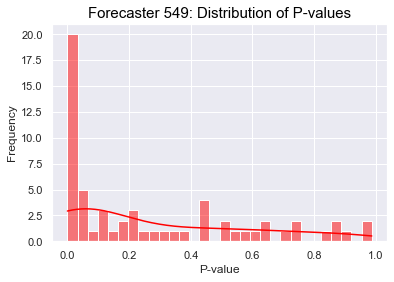

In [474]:
plot_column(Analysis_549, 'P-value', 'Forecaster 549', 'red')

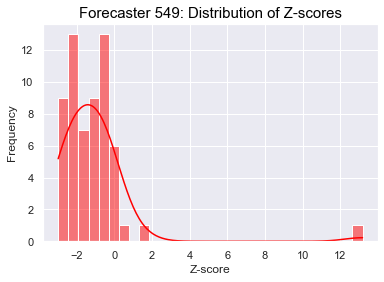

In [475]:
plot_column(Analysis_549, 'Z-score', 'Forecaster 549', 'red')

### Forecaster 518


In [476]:
#notes about how this works are contained in the Forecaster 549 heading 
#this follows the exact same process 

sampled_518 = standardized_sampled_data_df.xs(518.0, level='ID')
Analysis_518 = sampled_518.join(Annual_Unemployment, how = 'left')
Analysis_518['Z-score'] = (Analysis_518['Observed Unemployment'] - Analysis_518['Mean'])/Analysis_518['Standard Deviation']
Analysis_518['P-value'] = 2*(1- norm.cdf(np.abs(Analysis_518['Z-score'])))
Analysis_518.head()

,Mean,Standard Deviation,Observed Unemployment,Z-score,P-value
Date,,,,,
2009Q2,13.295714,3.332856,9.283333,-1.203887,0.228633
2009Q3,13.000648,3.277735,9.283333,-1.134111,0.256748
2009Q4,13.737104,3.287817,9.283333,-1.354629,0.175536
2010Q1,10.594543,1.877608,9.608333,-0.525248,0.599411
2010Q2,10.555076,1.940884,9.608333,-0.487789,0.625699


#### plots


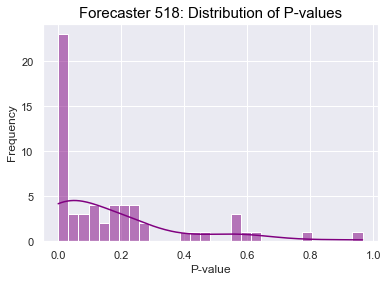

In [477]:
plot_column(Analysis_518, 'P-value', 'Forecaster 518', 'purple')

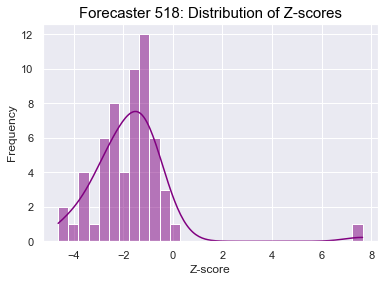

In [478]:
plot_column(Analysis_518, 'Z-score', 'Forecaster 518', 'purple')

### Forecaster 510


In [479]:
#notes about how this works are contained in the Forecaster 510 heading 
#this follows the exact same process 


sampled_510 = standardized_sampled_data_df.xs(510.0, level='ID')

Analysis_510 = sampled_510.join(Annual_Unemployment, how = 'left')
Analysis_510['Z-score'] = (Analysis_510['Observed Unemployment'] - Analysis_510['Mean'])/Analysis_510['Standard Deviation']
Analysis_510['P-value'] = 2*(1- norm.cdf(np.abs(Analysis_510['Z-score'])))
Analysis_510.head()

,Mean,Standard Deviation,Observed Unemployment,Z-score,P-value
Date,,,,,
2009Q2,9.148135,0.295768,9.283333,0.457109,0.647593
2009Q3,9.901775,0.517399,9.283333,-1.195289,0.231974
2009Q4,11.242045,2.357724,9.283333,-0.830764,0.406107
2010Q1,9.194821,0.372140,9.608333,1.111173,0.266494
2010Q2,9.054835,0.409507,9.608333,1.351622,0.176496


#### plots


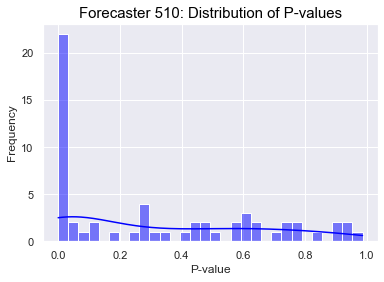

In [480]:
plot_column(Analysis_510, 'P-value', 'Forecaster 510', 'blue')

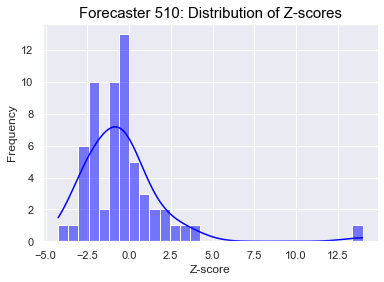

In [481]:
plot_column(Analysis_510, 'Z-score', 'Forecaster 510', 'blue')

## Macro View
- We can now compare hte characteristics of each distribution, and culminate all of our period data together.
- We will attain the average p-value, the null rejection rate, and the mean z-score for each of the 3 forecasters in our analysis.
- The null rejection rate is defined as the percentage of p-values for a particular ID's forecasts fall below the 0.05 (5%) threshold. If a P-value is greater than 0.05 for a particular period, we fail to reject the null that the forecasters are rational. However, if a P-value is less than 0.05 for a particular period, we reject the null of rationality, and conclude that the forecasters were irrational for a particular period.


In [482]:

average_p_value_549 = Analysis_549['P-value'].mean() #computes mean p value 
null_rejection_rate_549= ((Analysis_549['P-value'] < 0.05).sum())/ len(Analysis_549['P-value'])
#computes the null_rejection rate 

mean_z_score_549 = Analysis_549['Z-score'].mean() #compute the mean z-score of the forecasts 

#repeated for 518
average_p_value_518  = Analysis_518['P-value'].mean()
null_rejection_rate_518= (((Analysis_518['P-value'] < 0.05).sum())/ len(Analysis_518['P-value']))
mean_z_score_518 = Analysis_518['Z-score'].mean()
#repeated for 510

average_p_value_510 = Analysis_510['P-value'].mean()
null_rejection_rate_510 = ((Analysis_510['P-value'] < 0.05).sum())/ len(Analysis_510['P-value'])
mean_z_score_510 = Analysis_510['Z-score'].mean()

#creating an ID_data dictionary which holds the information we have just computed 

ID_data = {'ID': [510, 549, 518 ],
    'Average P-value': [ average_p_value_510 , average_p_value_549, average_p_value_518],
    'Null Rejection Rate': [null_rejection_rate_510,  null_rejection_rate_549,   null_rejection_rate_518],
    'Mean Z-score': [mean_z_score_510,  mean_z_score_549, mean_z_score_518]
}

M2_Analysis = pd.DataFrame(ID_data) #turns the ID_data dict. into a dataframe 


M2_Analysis = M2_Analysis.set_index('ID') #sets the ID as the index, and gets rid of extra index column 

average_M2_Analysis = M2_Analysis.mean() #add a row for the mean of the ID information 
average_M2_Analysis.name = 'Aggregate' #name the row as aggregate row 

M2_Analysis = M2_Analysis.append(average_M2_Analysis) #add aggregate row to the dataframe 

M2_Analysis


/var/folders/g4/72psbb7d1lz1cfby8trq9sch0000gn/T/ipykernel_8617/1805345494.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  M2_Analysis = M2_Analysis.append(average_M2_Analysis) #add aggregate row to the dataframe


,Average P-value,Null Rejection Rate,Mean Z-score
ID,,,
510,0.324479,0.383333,-0.479248
549,0.283950,0.383333,-1.153050
518,0.175511,0.423729,-1.728756
Aggregate,0.261313,0.396798,-1.120351


This table conveys that over the entire period that these three forecasters produced forecasts of the annual unemployment rate, they were not particularly accurate.

## Accuracy Over Time


In [483]:
#the standardized_sampled_data_df is a multi-index data frame holds all the ID's mean forecasts 
standardized_sampled_data_df.index



MultiIndex([(549, '2009Q2'),
            (549, '2009Q3'),
            (549, '2009Q4'),
            (549, '2010Q1'),
            (549, '2010Q2'),
            (549, '2010Q3'),
            (549, '2010Q4'),
            (549, '2011Q1'),
            (549, '2011Q2'),
            (549, '2011Q3'),
            ...
            (518, '2021Q4'),
            (518, '2022Q1'),
            (518, '2022Q2'),
            (518, '2022Q3'),
            (518, '2022Q4'),
            (518, '2023Q1'),
            (518, '2023Q2'),
            (518, '2023Q3'),
            (518, '2023Q4'),
            (518, '2024Q1')],
           names=['ID', 'Date'], length=179)

In [484]:
Annual_Unemployment.index

PeriodIndex(['2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2', '2010Q3',
             '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1',
             '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3',
             '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1',
             '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3',
             '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3',
             '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1',
             '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3',
             '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4', '2024Q1',
             '2024Q2', '2024Q3', '2024Q4'],
            dtype='period[Q-DEC]', name='observation_date')

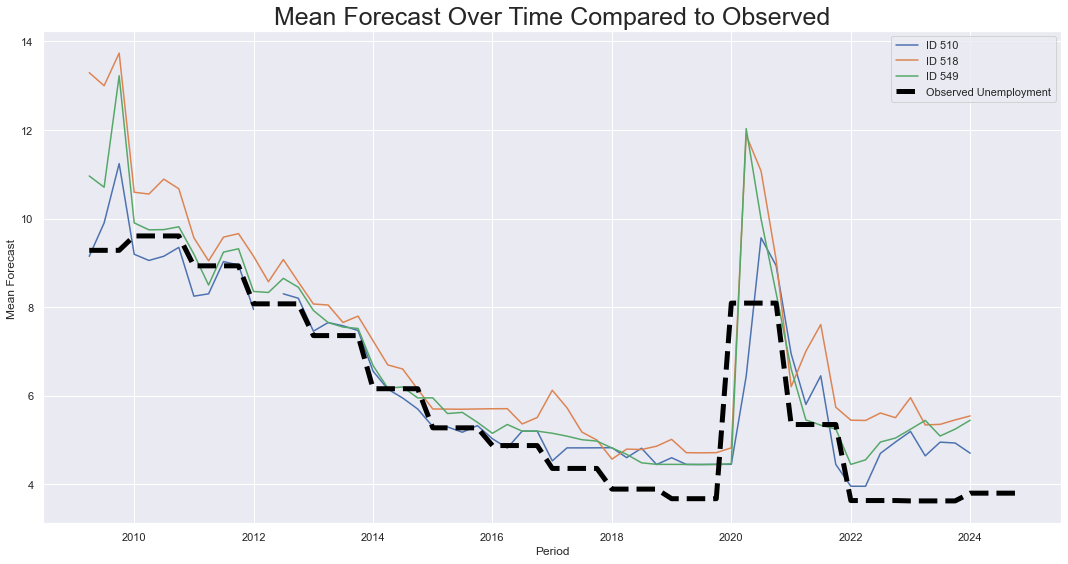

In [485]:
plt.figure(figsize=(15, 8))

plotting_mean_data_df = standardized_sampled_data_df.reset_index() #gets rid of the multiindex from the sampled_data_df 
#creats new Df specifically for plotting the data 
plotting_mean_data_df['Date'] = plotting_mean_data_df['Date'].dt.to_timestamp()
#when plotting we need to convert it to a timestamp() value 


# Group data by 'ID' and plot each group
for id, data in plotting_mean_data_df.groupby('ID'): #groups the IDs and plots 
    
    plt.plot(data['Date'], data['Mean'], label=f'ID {id}') #plots the mean forecast/prediction and the time it occurs 
    
Plotting_Annual_Unemployment = Annual_Unemployment.reset_index() #saves the annual unemployment without an index in a new variable 
Plotting_Annual_Unemployment['Date'] = Plotting_Annual_Unmployment['observation_date'].dt.to_timestamp()
#adds makes the observation date the date as a timestamp ()

plt.plot(Plotting_Annual_Unemployment['Date'], Plotting_Annual_Unemployment['Observed Unemployment'], label='Observed Unemployment', color='black', linestyle='--', linewidth=5)
#plots the date and the observed unemployment value (what actually occured)
plt.title('Mean Forecast Over Time Compared to Observed', fontsize=25)
plt.xlabel('Period')
plt.ylabel('Mean Forecast ')
plt.tight_layout()
plt.legend()
plt.show()


This plot shows that the mean forecast of our forecasters is actually relatively similar to the observed value. We can also see from this that the forecaster with ID 510 is most accurate, since the blue line is closest to the black line (actual values)

## Analysis

**recall:**


In [486]:
M2_Analysis #snapshot of the overall statistical charactersitics of each ID, and the 3 on aggregate. 

,Average P-value,Null Rejection Rate,Mean Z-score
ID,,,
510,0.324479,0.383333,-0.479248
549,0.283950,0.383333,-1.153050
518,0.175511,0.423729,-1.728756
Aggregate,0.261313,0.396798,-1.120351


Interestingly, the forecasters have tended to underforecast the unemployment rate, which we can determine based on the z-scores. For each of the 3 ID's being analyzed, the mean Z-score is well below 0. This means that, on average, given the standard deviation implied by the forecasters, they were a full standard deviation less than the true annual unemployment rate.

There could be several reasons why the forecasters tended to overestimate the level of unemployment, but one reason could be shocks to the eocnomy which created incredibly high levels of unemployment, and were impossible to fully predict with the information the forecasters had. The most obvious and recent example of this is the COVID-19 pandemic, which resulted in extrordinarily high unemployment.
We can see from our time trend graph, that the height of the COVID-19 pandemic was when forecasters and reality were most out-of-touch. Forecasters predicted higher unemployment values than were observed over the course of the 2020 year.

Another interesting trend depicted in the graph, is that forecasters have expect the unemployment rate to climb over the past few years, but it has not budged. Since 2022, the unemployment rate has remained steady at around 4%.  Also notably, the forecasters are more closely aligned in prediction with eachother, than any of the forecasters are aligned with the real unemployment rate. This is because the forecasters are likley using similar metrics and information to generate their predictions.

The graph of the forecasters' predictions and the observed values paints a much different picture than the one painted by the numerical data. The standard deviation of the forecasters forecasts was implied to be very small, because the forecasters did not (usually) utilize all 10 columns or intervals. So, if an observed value fell outside of their implied intervals, the p-value 'punishes' them harshly. Consequently, many forecasters attained a p-value of 0 for a particular period, even though their mean forecast was somewhat accurate. The forecasters distributions were too narrow, or in other words, the forecasters were more sure of what reality would be than they should have been.

However, when we have a visual element to analyze, we can see that the mean was not too far away from reality for most of the time period. For this reason, the visual analysis we created with the time series graph makes it more difficult to conclude whether or not the forecasters are rational. If the forecasters only provided mean estimates rather than probability distributions, their forecast error metrics would be much more favorable.

# Overall Conclusion:
## The 3 Forecasters Analyzed are Not Rational With Their Probability Intervals

The standard deviation or standard error of the forecasters is very small, even though the deviation of the unemployment rate over time is much larger. Still, there were a multitude of instances in which the unemployment rate fell into an interval which forecasters determined had a zero (0%) probability of occuring. The forecasters are irrational for not including some probability, however small, of the unemployment rate falling in this interval. There were several periods in which forecasters only included 2-3 intervals, with one of the intervals containing up to 80% of the probability distribution. This level of certainty with respect to the future value of unemployment is misguided. 

In each ID, and each period in the ID's, we use the null hypothesis that the true unemployment rate was drawn from the distribution implied by the forecasters' intervals, and the null being false as our alternative. When we do this, we determine that a large amount of the forecasting periods (39.6790 %) lead to null hypothesis rejection.

Forecasters consistently over-estimate what the level of unemployment will be. All three of our ID's forecasts had aggregate negative z-scores, meaning the true unemployment was often lower than predicted by the forecasters. In other words, if the actual unemployment was drawn from teh forecasters' implied distribution, the actual unemplyoment value would typically be about a standard deviation lower than the mean of the distribution, which is incredibly unlikley if it were truly drawn from the forecasters' prediction intervals.

The average p-value of the forecasters' forecasts given the true unemployment was about 0.26, which is low, but not extremely low. Still, the high sample size means that an aggregate p-value of 0.26 could suggest that the forecasters are irrational, even if 0.26 is still greater than our null hypothesis rejection threshold of 0.05.

The visualization of the mean forecasts against the true unemployment shows that the forecasters follow the observed unemployment level somewhat closely. This suggests that the low p-value and high z-score are a consequence of poor interval estimation (forecasters believe the interval is too small relative to reality) rather than their average estimations of the unemployment level being off-base.

Forecasters are much more in-line with reality during the 2009-2018 period, than the 2018-2024 period. Especially durign the 2022-2024 period, the forecasters' beliefs about both the value, and trend of unemployment have not been particularly accurate.
